In [241]:
import pandas as pd
import numpy as np
import scipy as sp
import os
#  
# import backend
import tensorflow as  tf
#
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
# all layers 
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential ,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D,MaxPool2D, Activation, MaxPooling2D,GlobalAveragePooling2D
#from tensorflow.keras.layers.normalization import BatchNormalization
# 
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.constraints import maxnorm
# Data processing

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# confusion matrix 
# Scikit Imports
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc, precision_recall_curve , classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#import cnn_utils as utils
#from model_evaluation_utils import get_metrics
#from sklearn.metrics import classification_report, confusion_matrix
# Progressor
# tranfer learning app 
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input,decode_predictions
#from tensorflow.keras.applications import VGG19,ResNet50
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
from io import BytesIO
from IPython.display import display, HTML


In [20]:
#VGG19 can classify 1,000 different images.First, instantiate a VGG19 model pre-loaded with weights trained on ImageNet. include_top=True means , 
#i will use this pretrained model to check with some new images for my trial(just giving try how it is working for new images).
# second part of my code , i will add include_top=False . for using this pretrained model as basemodel and addition layer i will
#  add in last layer .we use transfer learning with this model, we will strip off the final layers.

In [21]:
#model = MobileNet(weights='imagenet',include_top=True)
#model = ResNet50(weights='imagenet',include_top=True)
model = VGG19(weights='imagenet',include_top=True)

In [22]:
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
#testing with feeding different images and checking how the pretrained model VGG19 predicts the correct class, so above we set include_top=True.

'********************'

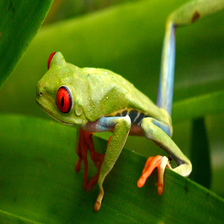

[31]
40960/35363 [==================================] - 0s 0us/step
('n01644373', 'tree_frog', 0.9972824)
('n01644900', 'tailed_frog', 0.002690374)
('n02259212', 'leafhopper', 1.1327959e-05)
('n01641577', 'bullfrog', 4.0550253e-06)
('n02256656', 'cicada', 1.9846682e-06)


'********************'

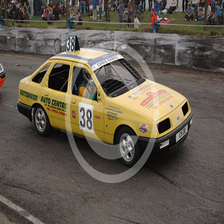

[468]
('n02930766', 'cab', 0.7907632)
('n04037443', 'racer', 0.08739983)
('n02701002', 'ambulance', 0.022572853)
('n03895866', 'passenger_car', 0.022257188)
('n04285008', 'sports_car', 0.022147655)


'********************'

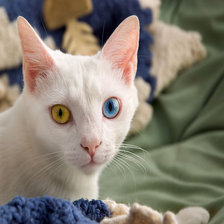

[285]
('n02124075', 'Egyptian_cat', 0.905235)
('n02123045', 'tabby', 0.033015594)
('n02123159', 'tiger_cat', 0.03284551)
('n02127052', 'lynx', 0.01001123)
('n02123597', 'Siamese_cat', 0.0037523003)


'********************'

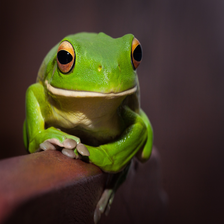

[31]
('n01644373', 'tree_frog', 0.9951291)
('n01644900', 'tailed_frog', 0.0048618703)
('n01641577', 'bullfrog', 6.527021e-06)
('n01739381', 'vine_snake', 8.943839e-07)
('n01693334', 'green_lizard', 6.1683807e-07)


'********************'

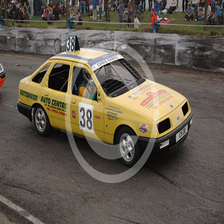

[468]
('n02930766', 'cab', 0.7907632)
('n04037443', 'racer', 0.08739983)
('n02701002', 'ambulance', 0.022572853)
('n03895866', 'passenger_car', 0.022257188)
('n04285008', 'sports_car', 0.022147655)


'********************'

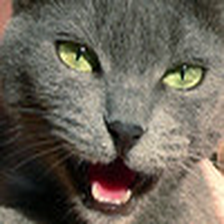

[285]
('n02124075', 'Egyptian_cat', 0.39740217)
('n02123597', 'Siamese_cat', 0.12170675)
('n02125311', 'cougar', 0.08433178)
('n02123045', 'tabby', 0.078765556)
('n02127052', 'lynx', 0.07163065)


In [24]:

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    
    "https://upload.wikimedia.org/wikipedia/commons/9/99/Red-eyed_tree_frog.jpg",
    "https://farm3.static.flickr.com/2359/2162410480_7346414fd6.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/June_odd-eyed-cat.jpg/1106px-June_odd-eyed-cat.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/cd/Green_Tree_Frog_0277.jpg",
    "https://farm3.static.flickr.com/2359/2162410480_7346414fd6.jpg",
    "https://farm2.static.flickr.com/1207/620685615_9d7a1d0189_t.jpg"
]

def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("********************")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

In [277]:
# loading the dataset from CIFAR10
from tensorflow.keras.datasets import cifar10
(X_train, y_train) , (X_test, y_test) = cifar10.load_data()
# here one hot encoding for actual test data and scaling for actual test set 


In [278]:
#X_train, X_test1, y_train, y_test1 = train_test_split(X_train, y_train, test_size=0.2, random_state=2)

In [279]:
# summarize loaded dataset, shape is in 32x32 and colour image so channels =3
print('X_train: X=%s, y=%s' % (X_train.shape, y_train.shape))

print('X_test: X=%s, y=%s' % (X_test.shape, y_test.shape))

X_train: X=(50000, 32, 32, 3), y=(50000, 1)
X_test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
from  skimage import transform
new_shape = (48,88,3)
x_train = np.asarray([transform.resize(image, new_shape) for image in x_train])

In [280]:
# normalize pixel values
X_test = X_test.astype('float32')
X_test=  X_test / 255.0
# Convert categorical values int one hot encoding .
#import keras
num_classes = 10


# here one hot encoding for actual test data and scaling for actual test set 
# normalize pixel values
X_train = X_train.astype('float32')
X_train =  X_train / 255.0


In [281]:
# here one hot encoding for train and test data 
num_classes = 10
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
# Convert categorical values int one hot encoding .
#import keras

y_train = tf.keras.utils.to_categorical(y_train, num_classes)

In [282]:
#reload the vgg19 and set the include_top parameter to False. This setting instructs Keras not to load the final classification layers. 
base_model_1 = VGG19(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

In [201]:
#base_model_1 = ResNet50(include_top=False,weights='imagenet',input_shape=(32,32,3),classes=y_train.shape[1])

In [283]:
#Lets add the final layers to these base models where the actual classification is done in the dense layers

model_1= Sequential()
model_1.add(base_model_1) 
model_1.add(Flatten())

In [284]:
#Before we add the dense layers we must know the shape of the
# output of the flatten layer so we can define the input shape to the dense layer accordingly.
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [264]:
#for layer in model_1.layers[:-2]:
#	layer.trainable = False


In [285]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
Total params: 20,024,384
Trainable params: 20,024,384
Non-trainable params: 0
_________________________________________________________________


In [286]:
#So after the flatten layer we see the output to be a vector of (512,1).This will help in deciding 
#the number of neurons in the dense layer following the flatten layer.
#Add the Dense layers along with activation and batch normalization
model_1.add(Dense(1024,activation=('relu'),input_dim=512))
model_1.add(Dense(512,activation=('relu'))) 
model_1.add(Dense(256,activation=('relu'))) 
model_1.add(Dropout(.3))#Adding a dropout layer that will randomly drop 30% of the weights
model_1.add(Dense(128,activation=('relu')))
model_1.add(Dropout(.2))
model_1.add(Dense(10,activation=('softmax'))) #This is the classification layer

In [287]:
model_1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_12 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 1024)              525312    
_________________________________________________________________
dense_61 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_62 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_24 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)             

In [269]:
#Learning Rate Annealer: The learning rate can be modified after a set number of epochs or after a certain condition is met. We will use the latter and change the learning rate if 
#the validation error does not reduce after a set number of epochs. To do this we will use the patience parameter.'''

lrr= ReduceLROnPlateau(
                       monitor='val_acc', #Metric to be measured
                       factor=.01, #Factor by which learning rate will be reduced
                       patience=3,  #No. of epochs after which if there is no improvement in the val_acc, the learning rate is reduced
                       min_lr=1e-5) #The minimum learning rate 

In [288]:
learn_rate=.001

sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
#adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [271]:
#model_1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
#model_1.compile(optimizer= 'adam',
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#            loss = 'categorical_crossentropy',
#            metrics=['accuracy'])

In [289]:
model_1.compile(optimizer='sgd' ,
#              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            loss = 'categorical_crossentropy',
            metrics=['accuracy'])

In [214]:
#generating more data using the existing data.
#Randomly Zoom by 10% some training images.
#Randomly shift images horizontally by 10% of the width.
#Randomly shift images vertically by 10% of the height.
#Randomly flip images horizontally.

In [290]:
train_datagen = ImageDataGenerator(zca_epsilon=0,
                            rotation_range=2,
                            horizontal_flip = True,
                            zoom_range=.1
                            
                            )
test_datagen = ImageDataGenerator(zca_epsilon=0,
                                    rotation_range=2, 
                                    horizontal_flip= True,
                                    zoom_range=.1
                                  
                                  ) 

In [291]:
#Fit the augmentation method to the data

train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [292]:
y_test[0:2]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [293]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1)
# get batch iterator for training
train_iterator = train_datagen.flow(X_train, y_train,batch_size= 32,shuffle=True)
# get batch iterator for test
test_iterator = test_datagen.flow(X_test, y_test,batch_size= 32,shuffle=True)
# fit model
#history = model.fit_generator(train_iterator, validation_data=test_iterator, epochs = 20,callbacks=[lrr],verbose=1)
history = model_1.fit_generator(train_iterator, validation_data=test_iterator, epochs =4,verbose=1,callbacks=[callback])

Epoch 1/8
1563/1563 [==============================] - 63s 41ms/step - loss: 1.2959 - accuracy: 0.5540 - val_loss: 0.8023 - val_accuracy: 0.7295
Epoch 2/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7771 - accuracy: 0.7462 - val_loss: 0.6709 - val_accuracy: 0.7796
Epoch 3/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6347 - accuracy: 0.7918 - val_loss: 0.6556 - val_accuracy: 0.7849
Epoch 4/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.5465 - accuracy: 0.8214 - val_loss: 0.5469 - val_accuracy: 0.8157
Epoch 5/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4795 - accuracy: 0.8441 - val_loss: 0.5090 - val_accuracy: 0.8277
Epoch 6/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.4377 - accuracy: 0.8570 - val_loss: 0.4882 - val_accuracy: 0.8383
Epoch 7/8
1563/1563 [==============================] - 63s 40ms/step - loss: 0.3908 - accuracy: 0.8705 - val_loss: 0.4829 - val_ac

In [295]:
# Evaluate the model for test data

# evaluate model loss on test dataset
test_loss, test_acc = model_1.evaluate_generator(test_iterator, verbose=2)

313/313 - 5s - loss: 0.4634 - accuracy: 0.8493


In [296]:
# plot loss and accuracy during training for train and test data
# plot loss during training
def plotmodel(hist): 
    plt.subplot(211)
    plt.title('Loss')
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='Actual test dataset with Transfer learning ')
    plt.legend()
# plot accuracy during training
    plt.subplot(212)
    plt.title('Accuracy')
    plt.plot(history.history['accuracy'], label='train')
    plt.plot(history.history['val_accuracy'], label='Actual test dataset with Transfer learning')
    plt.legend()
    plt.show()

In [297]:
# confusion matrix for 10 classes , how many correctly classified and how many not classified properly.
def plot_confusion_matrix(y_test_cat, predicted_classes, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test_cat, predicted_classes )
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots(figsize=(7,7))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


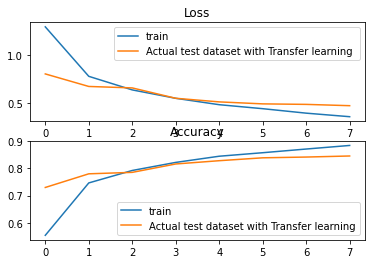

In [298]:
# printing , below graph shows overfitting train accuracy good but test accuracy down ,difference is there 
print(history.history.keys())
plotmodel(history)

In [299]:
# Evaluate the model for test data

predicted_classes = model_1.predict_classes(X_test) 
predicted_classes


array([3, 8, 1, ..., 5, 1, 7])

In [300]:
y_test[0:1]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [301]:
# basically it is in binary fromat ,so converting to numeric 
y_test = y_test.argmax(1)

In [302]:
y_test[0:20]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6])

In [303]:
# reshaping the pred array to same as actual test array 
# predicted_classes1 = predicted_classes.reshape(predicted_classes.shape[0],-1)
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Confusion matrix, without normalization


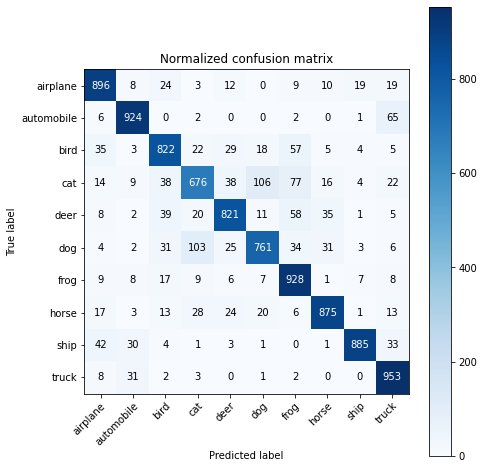

In [304]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predicted_classes, classes=class_names,
                      title='Normalized confusion matrix')

In [54]:
#random check ,few images urls feed into our model and checking the prediction.

'********************'

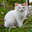

[5]


'********************'

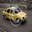

[1]


'********************'

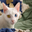

[1]


'********************'

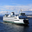

[8]


'********************'

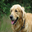

[1]


'********************'

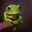

[1]
class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [306]:
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_CHANNELS = 3

images = [
     "https://images.all-free-download.com/images/graphiclarge/white_cat_sitting_189919.jpg",
     "https://farm3.static.flickr.com/2359/2162410480_7346414fd6.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a3/June_odd-eyed-cat.jpg/1106px-June_odd-eyed-cat.jpg",
    "https://images.all-free-download.com/images/graphicthumb/seattle_ferry_199633.jpg",
    "https://images.all-free-download.com/images/graphiclarge/golden_retriever_dog_animal_221045.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/c/cd/Green_Tree_Frog_0277.jpg",

]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
    
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model_1.predict(x)
    
    display("********************")
    display(img)
    print(np.argmax(preds,axis=1))

   # lst = decode_predictions(preds, top=5)
   # for itm in lst[0]:
   #     print(itm)
   # print('Predicted:', decode_predictions(pred, top=3)[0])    
    # create a list containing the class labels
class_labels = ['airplane', 'automobile', 'bird','cat' ,'deer','dog','frog', 'horse','ship','truck']
print ("class names:" , class_labels[0:10])

In [307]:
model_1.save_weights('model_1.h5')

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#/content/drive/My Drive/IMG_20171028_112729190.jpg

'********************'

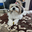

[1]


In [315]:
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0029.jpg")
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0042.jpg")
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0038.jpg")
img = Image.open("/content/drive/My Drive/IMG-20200729-WA0041.jpg")
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0027.jpg")
# frog below one 
#img = Image.open("/content/drive/My Drive/IMG-20200729-WA0043.jpg")
img = Image.open("/content/drive/My Drive/IMG-20200729-WA0036.jpg")
img.load()
img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model_1.predict(x)
display("********************")
display(img)
print(np.argmax(preds,axis=1))